In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
cancer = datasets.load_breast_cancer()
print("Feature: ", cancer.feature_names)

Feature:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print("Label: ", cancer.target_names)

Label:  ['malignant' 'benign']


In [7]:
X = cancer.data
X[:5,:]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [9]:
y = cancer.target
y[:5]

array([0, 0, 0, 0, 0])

In [10]:
#So luong moi lop, 0: malignant, 1: benign
print("malignant: ", y[y==0].size)
print("benign: ", y[y==1].size)

malignant:  212
benign:  357


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [15]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy is: ", accuracy_score(y_pred, y_test))

Accuracy is:  0.9532163742690059


In [18]:
#R^2 Score
print("The train score: ", clf.score(X_train, y_train))
print("The test score: ", clf.score(X_test, y_test))

The train score:  0.9698492462311558
The test score:  0.9532163742690059


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 57   6]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [20]:
#high accuracy: 0.95
#High precision: 0.97
#High train and test R^2 score, tuong tu nhu nhau
#=> model tot, co the su dung

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [23]:
#tinh do chinh xac cua: logistic, RandomForest, Naive bayes, SVM, KNN
models = [RandomForestClassifier(n_estimators= 200),
         LogisticRegression(solver='liblinear'),
         GaussianNB(),
         SVC(kernel='linear')]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
i = 0
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    print(accuracies)
    entries.append([model_name, accuracies.mean()])
    i +=1
cv_df = pd.DataFrame(entries, columns=['model_name', 'Accuracy'])

[0.92982456 0.94736842 0.99122807 0.97368421 0.97345133]
[0.92982456 0.93859649 0.97368421 0.94736842 0.96460177]
[0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
[0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]


In [25]:
cv_df

,model_name,Accuracy
0,RandomForestClassifier,0.963111
1,LogisticRegression,0.950815
2,GaussianNB,0.938519
3,SVC,0.945536


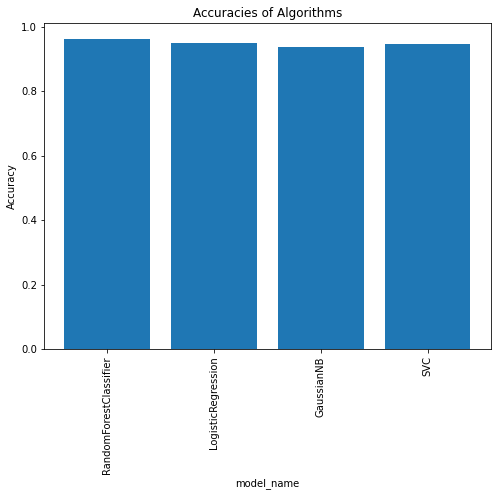

In [26]:
plt.figure(figsize= (8,6))
plt.bar(cv_df['model_name'], cv_df['Accuracy'])
plt.xlabel('model_name')
plt.ylabel('Accuracy')
plt.xticks(rotation = 'vertical')
plt.title("Accuracies of Algorithms")
plt.show()

In [28]:
#-> model RandomForest co do chinh xac cao hon nhung thoi gian se cham hon
#-> logistic don gian hon nhung do chinh xac cao gan bang voi randomForest nen se chon logistic